<a href="https://colab.research.google.com/github/xjfcnfw3/license-plate-recognition/blob/main/colab_note/YoLo_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15701, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 15701 (delta 7), reused 18 (delta 4), pack-reused 15672
Receiving objects: 100% (15701/15701), 14.43 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (10753/10753), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# yolo, 영상 처리, 딥러닝,
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5LPJRfxlcmZh6UcpJuFW")
project = rf.workspace("capstone-b46sq").project("number-or-word")
dataset = project.version(12).download("yolov5")
##test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/number-or-word-12 in yolov5pytorch:: 100%|██████████| 446/446 [00:00<00:00, 3383.54it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5LPJRfxlcmZh6UcpJuFW")
project = rf.workspace("capstone-b46sq").project("number-or-word")
dataset = project.version(17).download("yolov5")




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/number-or-word-17 in yolov5pytorch:: 100%|██████████| 2268/2268 [00:00<00:00, 2864.00it/s]


In [ ]:
!python train.py --img 256 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/number-or-word-17/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-171-g6e04b94 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h

In [ ]:
from google.colab.patches import cv2_imshow

# 끝이 --save-txt를 붙이면 결과 txt파일이 저장 / --save-crop 붙이면 사진 잘라줌
# 다른 옵션도 있긴한데 알아봐야됨
!python detect.py --weights runs/train/exp/weights/best.pt --img 256 --conf 0.4 --source {dataset.location}/valid/images --line-thickness 1 --save-txt

#!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ./video4.mp4 --line-thickness 3

# 동영상 링크 사용
# !python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source 'https://youtu.be/yYwdz0UCDCk'

# 웹캠 사용 -> 코앱에서는 안됨
# !python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source 0

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/number-or-word-17/valid/images, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-171-g6e04b94 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7155763 parameters, 0 gradients, 16.2 GFLOPs
image 1/106 /content/datasets/number-or-word-17/valid/images/-31-4019_jpg.rf.e51a9580780cc0df308264daa48b0d36.jpg: 128x256 1 0, 1 1, 1 3, 1 4, 1 9, 38.3ms
image 2/106 /content/datasets/number-or-word-17/valid/images/-31-4049_jpg.rf.42c3a4498ad4e6fbe314af043f657445.jpg: 128x256 1 0, 1 1, 1 3, 2 4s, 1 9, 5.8ms
image 3/1

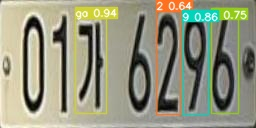

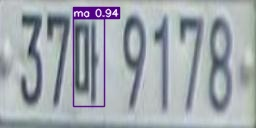

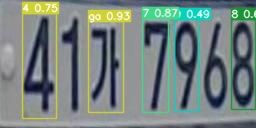

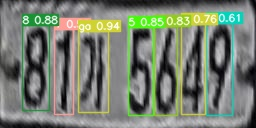

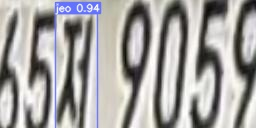

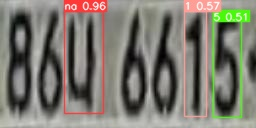

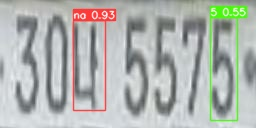

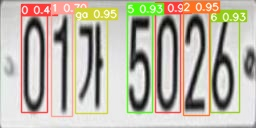

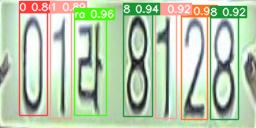

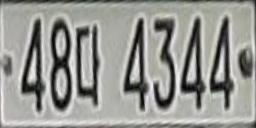

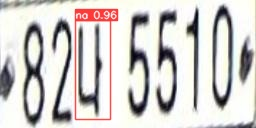

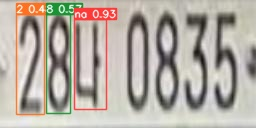

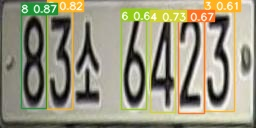

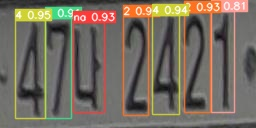

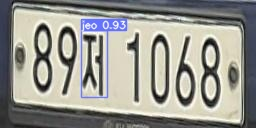

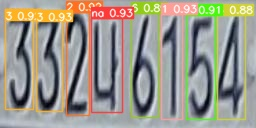

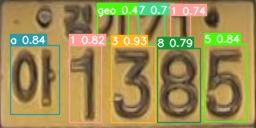

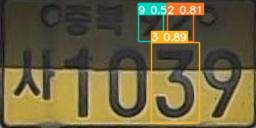

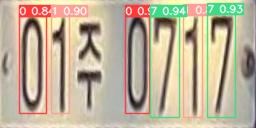

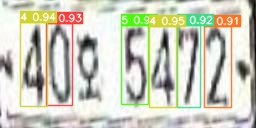

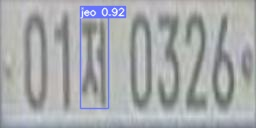

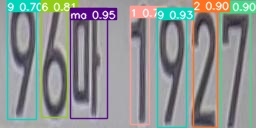

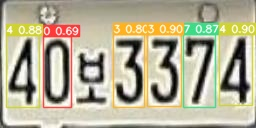

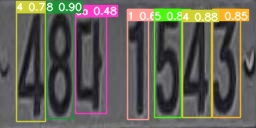

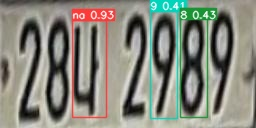

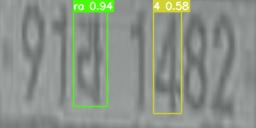

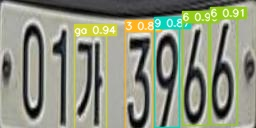

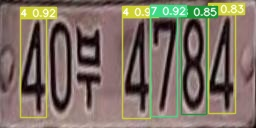

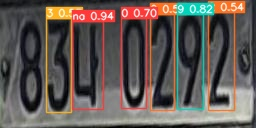

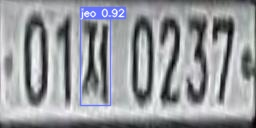

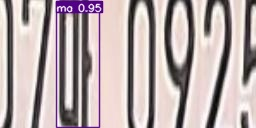

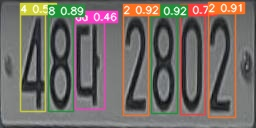

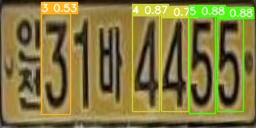

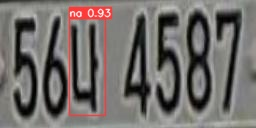

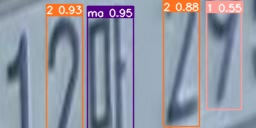

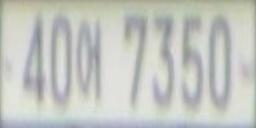

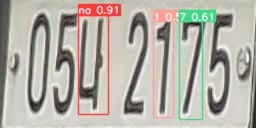

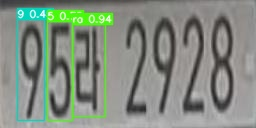

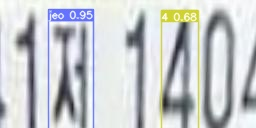

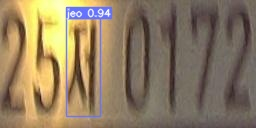

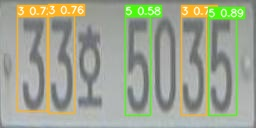

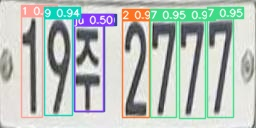

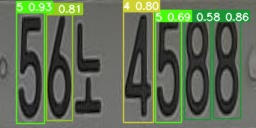

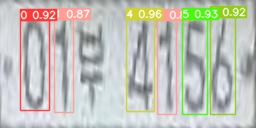

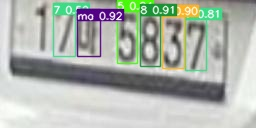

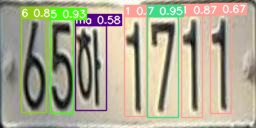

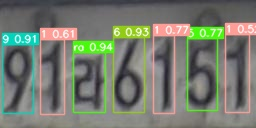

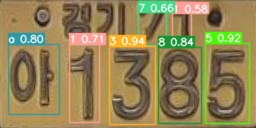

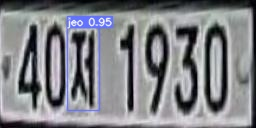

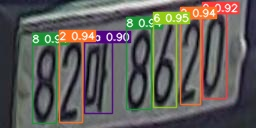

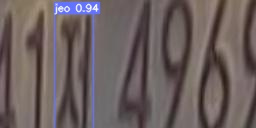

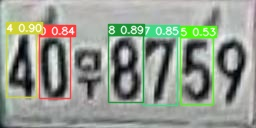

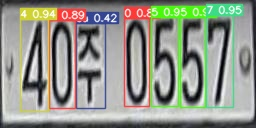

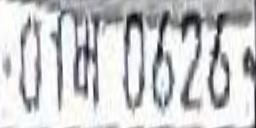

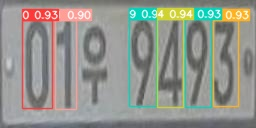

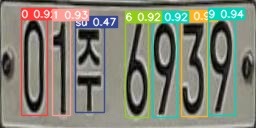

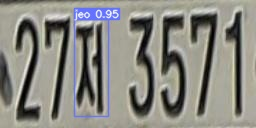

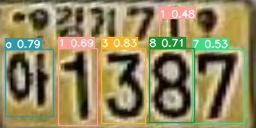

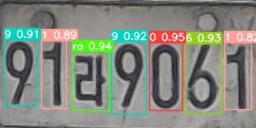

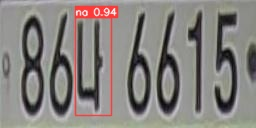

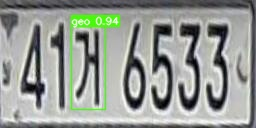

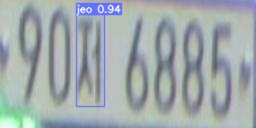

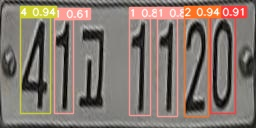

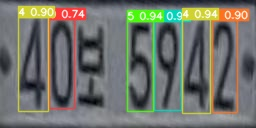

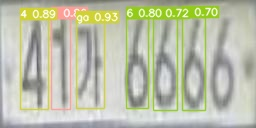

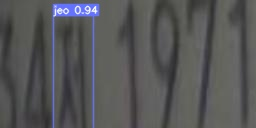

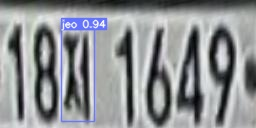

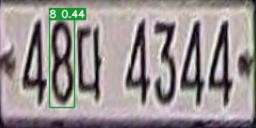

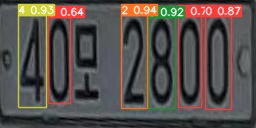

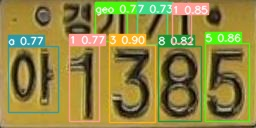

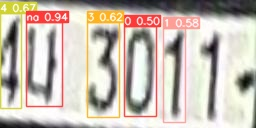

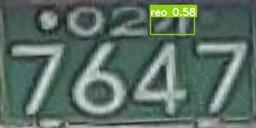

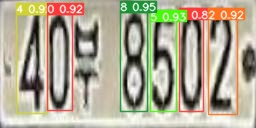

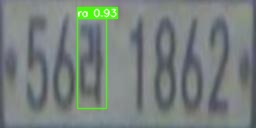

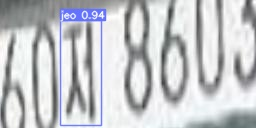

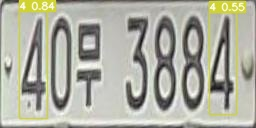

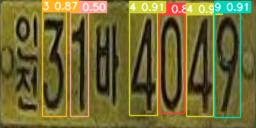

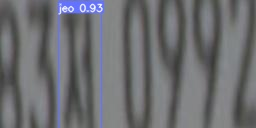

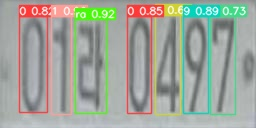

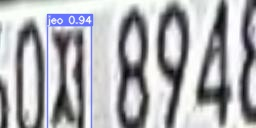

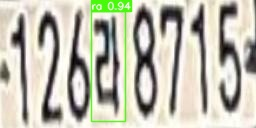

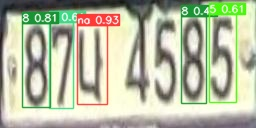

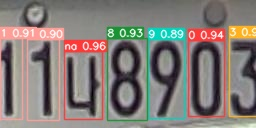

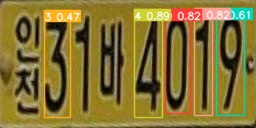

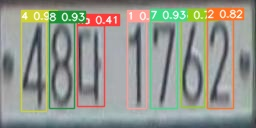

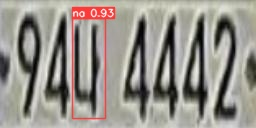

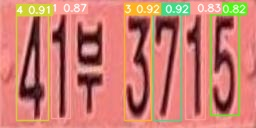

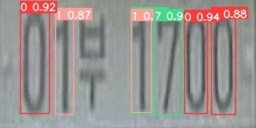

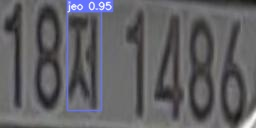

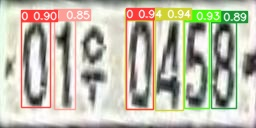

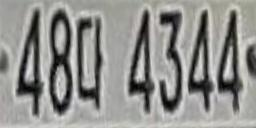

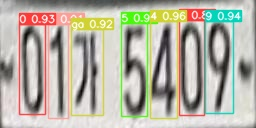

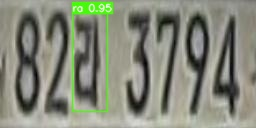

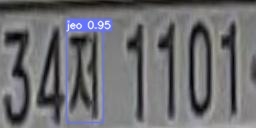

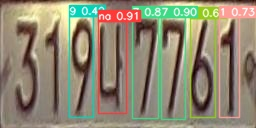

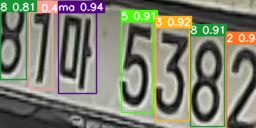

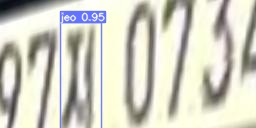

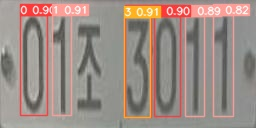

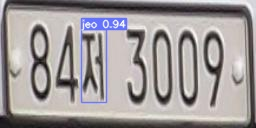

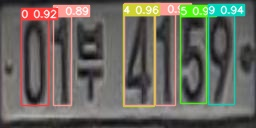

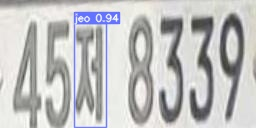

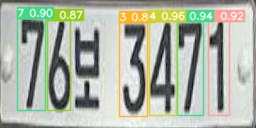

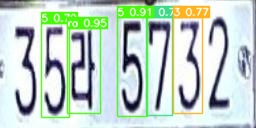

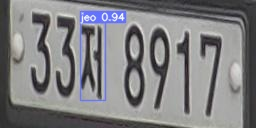

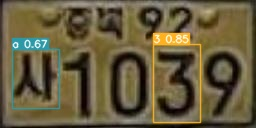

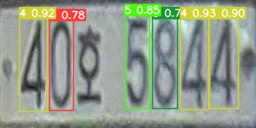

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

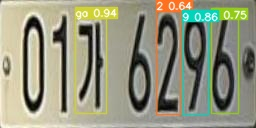

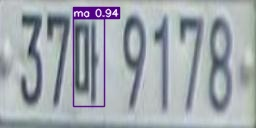

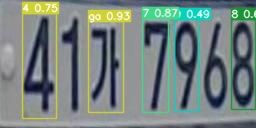

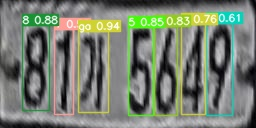

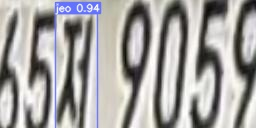

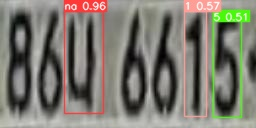

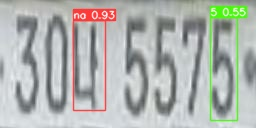

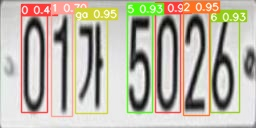

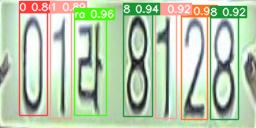

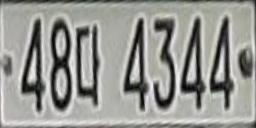

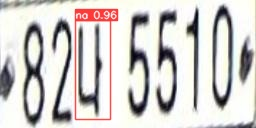

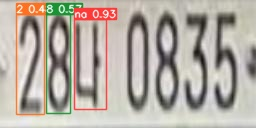

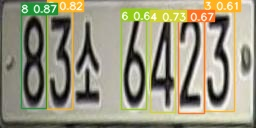

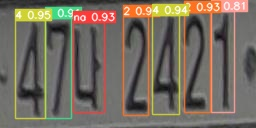

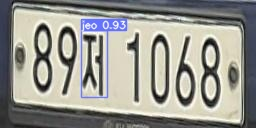

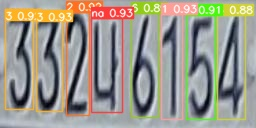

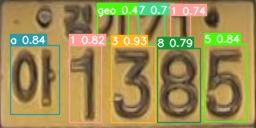

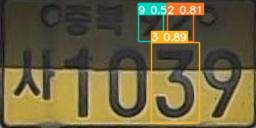

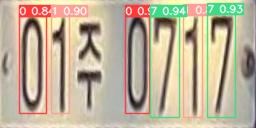

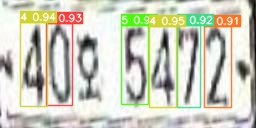

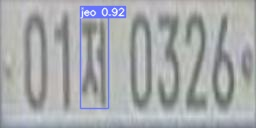

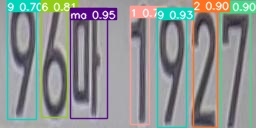

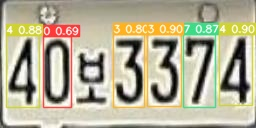

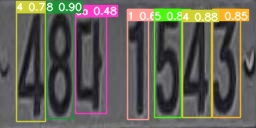

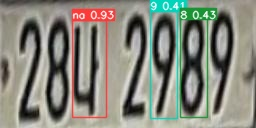

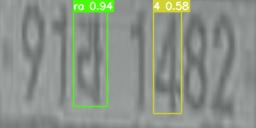

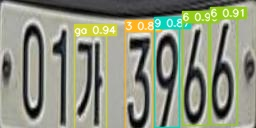

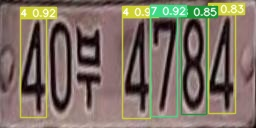

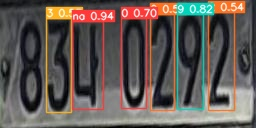

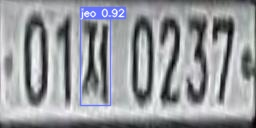

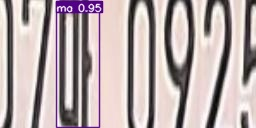

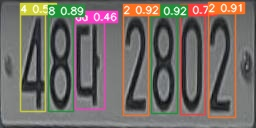

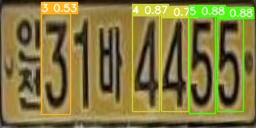

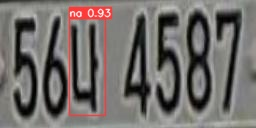

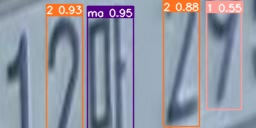

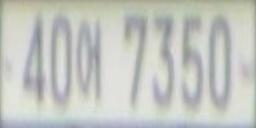

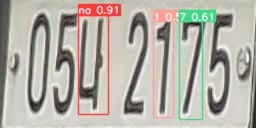

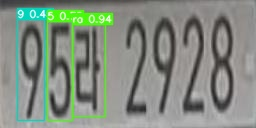

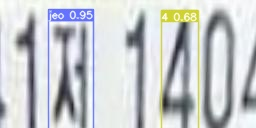

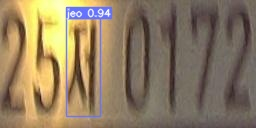

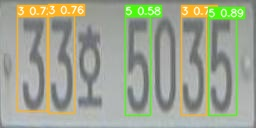

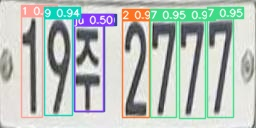

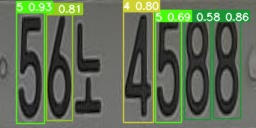

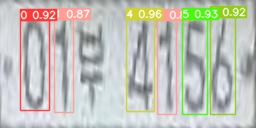

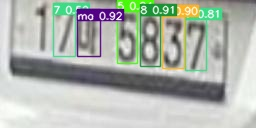

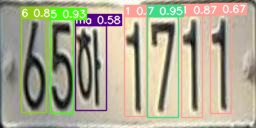

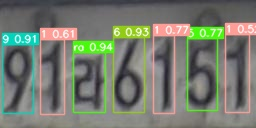

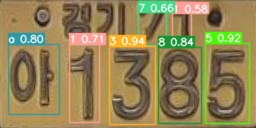

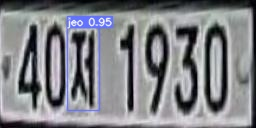

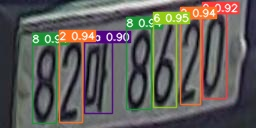

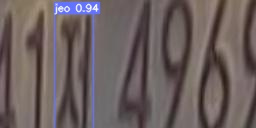

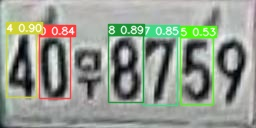

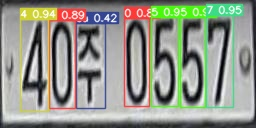

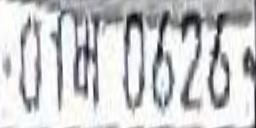

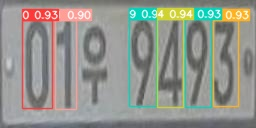

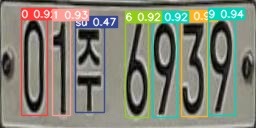

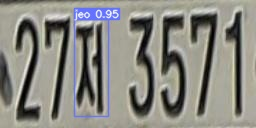

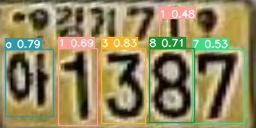

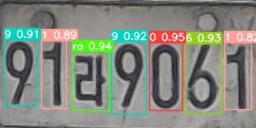

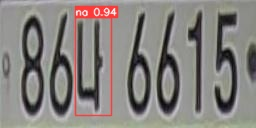

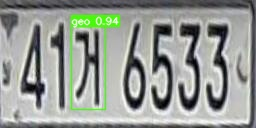

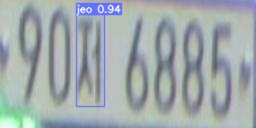

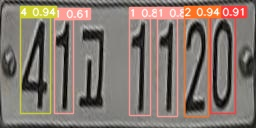

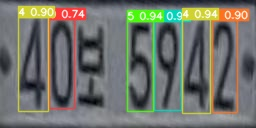

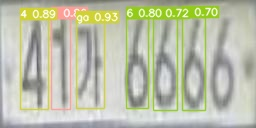

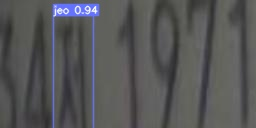

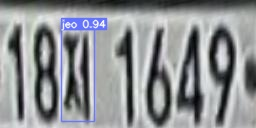

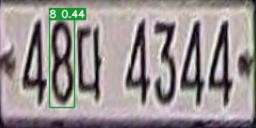

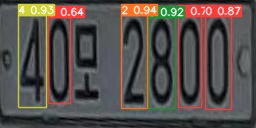

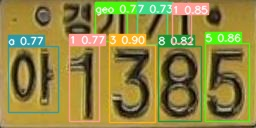

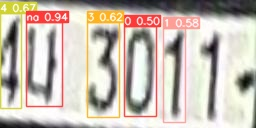

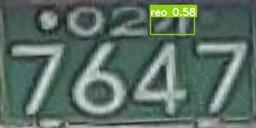

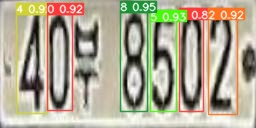

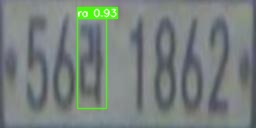

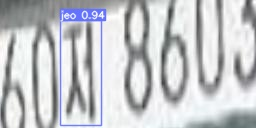

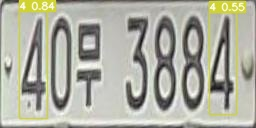

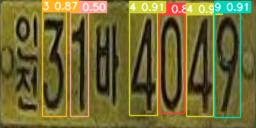

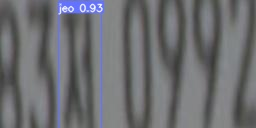

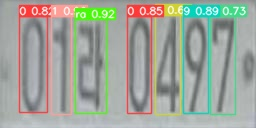

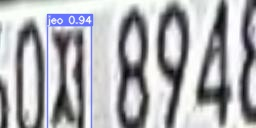

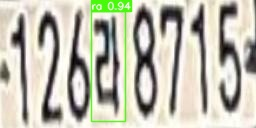

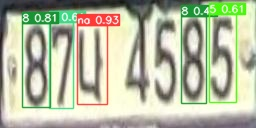

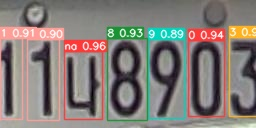

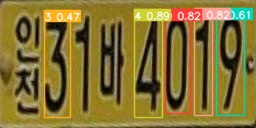

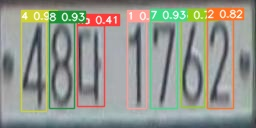

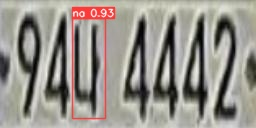

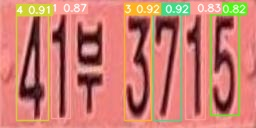

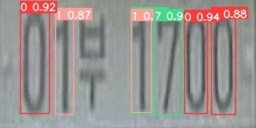

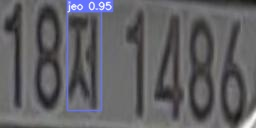

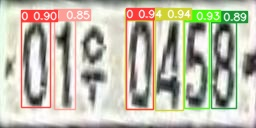

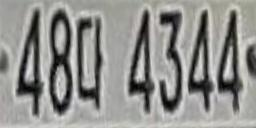

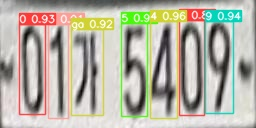

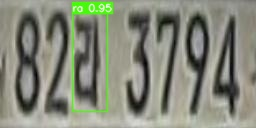

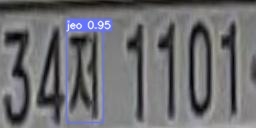

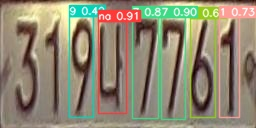

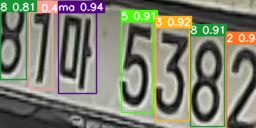

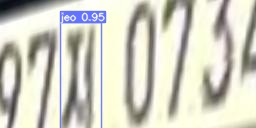

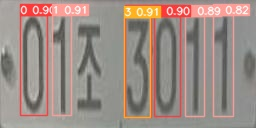

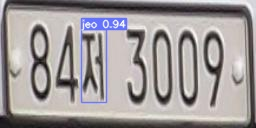

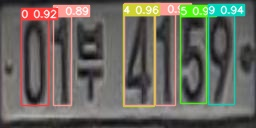

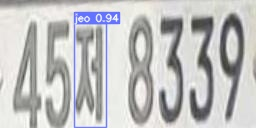

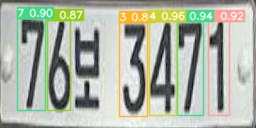

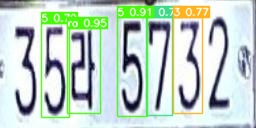

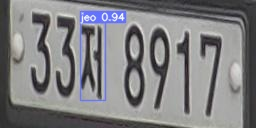

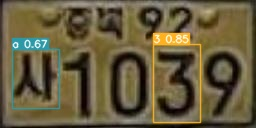

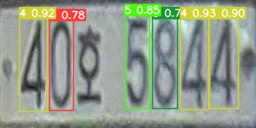

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")